In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [86]:
# read data from file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS4200-Predict-Covid-New-Cases/clean_state_ts.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,date,region,division,state,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,mask_mandate,daily_infection_rate,daily_death_rate,newCases_density,newDeaths_density
0,1.601942e+09,4,9,AK,145.0,9656.0,0.0,54.0,17587.0,643035.0,0.0,1565.0,1018.0,45.0,130.0,93.0,6.0,0,0.197712,0.000000,0.253518,0.000000
1,1.602029e+09,4,9,AK,128.0,9784.0,1.0,55.0,18076.0,650205.0,0.0,1565.0,1011.0,46.0,133.0,100.0,8.0,0,0.174532,0.001364,0.223795,0.001748
2,1.602115e+09,4,9,AK,135.0,9919.0,1.0,56.0,18542.0,656852.0,0.0,1569.0,1042.0,51.0,141.0,94.0,8.0,0,0.184076,0.001364,0.236034,0.001748
3,1.602202e+09,4,9,AK,180.0,10099.0,0.0,56.0,18907.0,664568.0,0.0,1604.0,1065.0,64.0,137.0,86.0,9.0,0,0.245435,0.000000,0.314712,0.000000
4,1.602288e+09,4,9,AK,251.0,10350.0,0.0,56.0,19173.0,668299.0,0.0,1604.0,969.0,54.0,137.0,89.0,9.0,0,0.342246,0.000000,0.438849,0.000000


In [87]:
# change state name to integer
states = df['state'].unique()
for i, j in enumerate(states):
    df['state'] = df['state'].replace(j, i)  
df.tail(5)

,date,region,division,state,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,mask_mandate,daily_infection_rate,daily_death_rate,newCases_density,newDeaths_density
21325,1.635984e+09,4,8,50,537.0,104940.0,0.0,1243.0,81819.0,1028372.0,255655.0,1748.0,941.0,179.0,139.0,72.0,36.0,0,0.930916,0.0,5.530381,0.0
21326,1.636070e+09,4,8,50,378.0,105318.0,0.0,1243.0,82057.0,1030728.0,256237.0,1748.0,923.0,181.0,139.0,76.0,36.0,0,0.655282,0.0,3.892894,0.0
21327,1.636157e+09,4,8,50,0.0,105318.0,0.0,1243.0,82202.0,1032878.0,256695.0,1747.0,881.0,169.0,137.0,79.0,37.0,0,0.000000,0.0,0.000000,0.0
21328,1.636243e+09,4,8,50,0.0,105318.0,0.0,1243.0,82344.0,1033805.0,256745.0,1747.0,881.0,175.0,137.0,78.0,41.0,0,0.000000,0.0,0.000000,0.0
21329,1.636330e+09,4,8,50,672.0,105990.0,0.0,1243.0,82367.0,1034107.0,256772.0,1602.0,806.0,185.0,139.0,74.0,41.0,0,1.164946,0.0,6.920700,0.0


In [88]:
#convert numpy.float to datetime
dates_input = df["date"].values.astype('datetime64[s]')
for i, j in enumerate(dates_input):
  df.loc[i, 'date'] = j

In [89]:
df.head(5)

,date,region,division,state,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,mask_mandate,daily_infection_rate,daily_death_rate,newCases_density,newDeaths_density
0,2020-10-06T00:00:00,4,9,0,145.0,9656.0,0.0,54.0,17587.0,643035.0,0.0,1565.0,1018.0,45.0,130.0,93.0,6.0,0,0.197712,0.000000,0.253518,0.000000
1,2020-10-07T00:00:00,4,9,0,128.0,9784.0,1.0,55.0,18076.0,650205.0,0.0,1565.0,1011.0,46.0,133.0,100.0,8.0,0,0.174532,0.001364,0.223795,0.001748
2,2020-10-08T00:00:00,4,9,0,135.0,9919.0,1.0,56.0,18542.0,656852.0,0.0,1569.0,1042.0,51.0,141.0,94.0,8.0,0,0.184076,0.001364,0.236034,0.001748
3,2020-10-09T00:00:00,4,9,0,180.0,10099.0,0.0,56.0,18907.0,664568.0,0.0,1604.0,1065.0,64.0,137.0,86.0,9.0,0,0.245435,0.000000,0.314712,0.000000
4,2020-10-10T00:00:00,4,9,0,251.0,10350.0,0.0,56.0,19173.0,668299.0,0.0,1604.0,969.0,54.0,137.0,89.0,9.0,0,0.342246,0.000000,0.438849,0.000000


In [90]:
max_date = max(df.date)
min_date = min(df.date)
print(min_date, max_date)
dates = pd.date_range(start=min_date, end=max_date)
dates

2020-09-01T00:00:00 2021-11-08T00:00:00


DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10',
               ...
               '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02',
               '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
               '2021-11-07', '2021-11-08'],
              dtype='datetime64[ns]', length=434, freq='D')

In [91]:
# keep 'cases','deaths', 'positiveTests', 'negativeTests', 'vaccinationsCompleted'
colmns=['newCases', 'cases', 'newDeaths', 'deaths', 'positiveTests', 'negativeTests', 'vaccinationsCompleted']
df = df.drop(['region', 'division', 'state', 
       'hospitalBeds.capacity', 'hospitalBeds.currentUsageTotal',
       'hospitalBeds.currentUsageCovid', 'icuBeds.capacity',
       'icuBeds.currentUsageTotal', 'icuBeds.currentUsageCovid',
       'mask_mandate', 'daily_infection_rate', 'daily_death_rate',
       'newCases_density', 'newDeaths_density'], axis=1)
df.head(5)

,date,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted
0,2020-10-06T00:00:00,145.0,9656.0,0.0,54.0,17587.0,643035.0,0.0
1,2020-10-07T00:00:00,128.0,9784.0,1.0,55.0,18076.0,650205.0,0.0
2,2020-10-08T00:00:00,135.0,9919.0,1.0,56.0,18542.0,656852.0,0.0
3,2020-10-09T00:00:00,180.0,10099.0,0.0,56.0,18907.0,664568.0,0.0
4,2020-10-10T00:00:00,251.0,10350.0,0.0,56.0,19173.0,668299.0,0.0


In [92]:
# build a new dataframe with the above columns only
dff = pd.DataFrame(0, index=np.arange(len(dates)), columns=colmns)
dff['date'] = dates
for k in dates:
  dff.loc[dff.date==k,'newCases'] = df.loc[df.date==k,'newCases'].sum()
  dff.loc[dff.date==k,'cases'] = df.loc[df.date==k,'cases'].sum()
  dff.loc[dff.date==k,'newDeaths'] = df.loc[df.date==k,'newDeaths'].sum()
  dff.loc[dff.date==k,'deaths'] = df.loc[df.date==k,'deaths'].sum()
  dff.loc[dff.date==k,'positiveTests'] = df.loc[df.date==k,'positiveTests'].sum()
  dff.loc[dff.date==k,'negativeTests'] = df.loc[df.date==k,'negativeTests'].sum()
  dff.loc[dff.date==k,'vaccinationsCompleted'] = df.loc[df.date==k,'vaccinationsCompleted'].sum()
dff.head(5)

,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,date
0,30916.0,4702669.0,784.0,158509.0,6073654.0,68354415.0,0.0,2020-09-01
1,33892.0,5437210.0,973.0,166839.0,7182320.0,75367071.0,0.0,2020-09-02
2,38710.0,5597051.0,1007.0,176906.0,7383692.0,78655070.0,0.0,2020-09-03
3,39578.0,5393914.0,838.0,169397.0,7143558.0,75761703.0,0.0,2020-09-04
4,37698.0,5748622.0,648.0,179589.0,7544954.0,81122947.0,0.0,2020-09-05


In [93]:
dff.set_index('date', inplace = True)

In [124]:
dff.tail(5)

,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted
date,,,,,,,
2021-11-04,78320.0,44706351.0,1067.0,735531.0,46590213.0,569106270.0,182571906.0
2021-11-05,88095.0,44794446.0,2282.0,737813.0,46657594.0,570361116.0,182742609.0
2021-11-06,31791.0,44826237.0,397.0,738210.0,46709601.0,571173546.0,182929722.0
2021-11-07,20641.0,39120671.0,104.0,657045.0,40995073.0,474910150.0,155144310.0
2021-11-08,89351.0,31262823.0,911.0,521309.0,32208956.0,397300981.0,126077427.0


In [97]:
# dff.to_csv("/content/drive/MyDrive/Colab Notebooks/CS4200-Predict-Covid-New-Cases/us_data.csv")

In [126]:
# split data by date range
df_train    = dff['2020-09-01': '2021-09-01']
df_validate = dff['2021-09-02':]
len(df_train)

366

In [127]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [128]:
# create 3 group of data for training, validating and predicting
generator_train = TimeseriesGenerator(df_train['newCases'], df_train['newCases'], length=6, batch_size=1)
generator_validate = TimeseriesGenerator(df_validate['newCases'], df_validate['newCases'], length=6, batch_size=1)

In [129]:
# lock the pseudo-random number generator, for assisting replicable analysis while using the the tensorflow model
tf.random.set_seed(13)
model_1 = tf.keras.Sequential([
tf.keras.layers.Dense(64, activation='relu', input_dim=6),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1)
])

In [130]:
# compile the model using mean squared error loss function and mean absolute error
model_1.summary()
model_1.compile(optimizer ='adam', loss='mse', metrics = 'mae')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                448       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [131]:
history= model_1.fit(generator_train, epochs = 360, validation_data = generator_validate)

Epoch 1/360
360/360 [==============================] - 2s 3ms/step - loss: 1017958592.0000 - mae: 18949.4883 - val_loss: 1915910528.0000 - val_mae: 31965.6836
Epoch 2/360
360/360 [==============================] - 1s 3ms/step - loss: 743927424.0000 - mae: 16765.9297 - val_loss: 1349380352.0000 - val_mae: 25979.8398
Epoch 3/360
360/360 [==============================] - 1s 3ms/step - loss: 683970560.0000 - mae: 16627.8301 - val_loss: 1747080064.0000 - val_mae: 33477.8203
Epoch 4/360
360/360 [==============================] - 1s 3ms/step - loss: 693355136.0000 - mae: 16130.1416 - val_loss: 965027456.0000 - val_mae: 21456.9375
Epoch 5/360
360/360 [==============================] - 1s 3ms/step - loss: 586628224.0000 - mae: 15647.5156 - val_loss: 1274507264.0000 - val_mae: 24543.8184
Epoch 6/360
360/360 [==============================] - 1s 3ms/step - loss: 520764896.0000 - mae: 15023.2275 - val_loss: 867170304.0000 - val_mae: 19641.9668
Epoch 7/360
360/360 [==============================] 

In [132]:
history.history
result =pd.DataFrame(history.history)
result.head(10)

,loss,mae,val_loss,val_mae
0,1.017959e+09,18949.488281,1.915911e+09,31965.683594
1,7.439274e+08,16765.929688,1.349380e+09,25979.839844
2,6.839706e+08,16627.830078,1.747080e+09,33477.820312
3,6.933551e+08,16130.141602,9.650275e+08,21456.937500
4,5.866282e+08,15647.515625,1.274507e+09,24543.818359
5,5.207649e+08,15023.227539,8.671703e+08,19641.966797
6,5.275683e+08,14961.849609,1.206686e+09,23551.542969
7,5.334496e+08,14431.667969,6.691464e+08,16371.047852
8,5.227958e+08,14955.289062,1.033375e+09,24116.613281
9,4.495160e+08,13659.678711,9.076495e+08,20858.021484


### Visualizing Loss

In [119]:
import seaborn as sns
sns.set_theme()

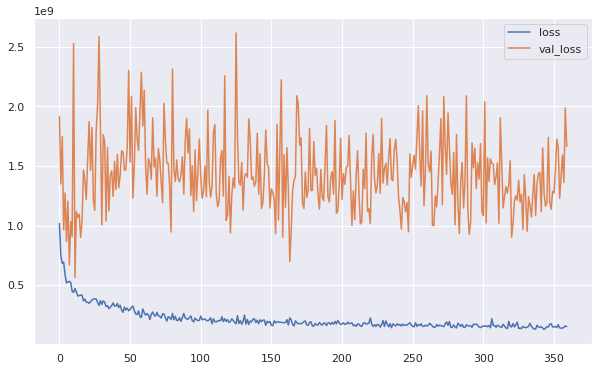

In [133]:
#val_loss is the value of cost function for your cross-validation data 
# and loss is the value of cost function for your training data. 
result[['loss', 'val_loss']].plot(figsize=(10,6))

In [134]:
df_test = dff['2021-10-01':] # end date is 2021-11-08
generator_test = TimeseriesGenerator(df_test['newCases'], df_test['newCases'], length=6, batch_size=1)

In [136]:
df_predict = model_1.predict(generator_test)
df_predict = tf.squeeze(df_predict)
df_predict.numpy().shape
df_predict_df = pd.DataFrame(df_predict, columns = ['Next_Day_Pred'])
df_predict_df.head()

,Next_Day_Pred
0,117305.250000
1,128847.578125
2,59304.832031
3,21583.529297
4,123948.109375


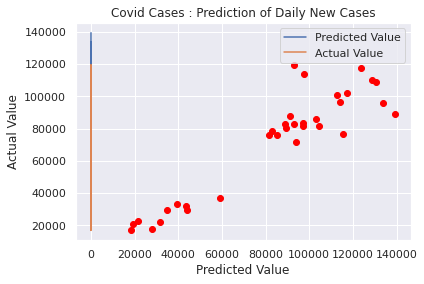

In [156]:

plt.scatter(df_predict,df_test['newCases'][6:], color='red')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Covid Cases : Prediction of Daily New Cases')
plt.plot(df_predict, label='Predicted Value')
plt.plot(df_test['newCases'][6:].values, label='Actual Value')
plt.legend();

In [153]:
Result_df=df_test[5:]
# discard the first 6 days from the test data - because we use the previous 6 days to predict the 7th day
# create a dataframe from the predicted data and show them side by side
df_predict_df['date'] = pd.date_range(start='2021-10-06', periods=len(df_predict_df), freq='D')
df_predict_df.date = pd.to_datetime(df_predict_df.date, format = '%d %B %Y')
df_predict_df.set_index('date', inplace = True)
result = pd.concat([Result_df, df_predict_df], axis=1)
result = result.drop(columns=['cases', 'newDeaths', 'deaths', 'positiveTests',
       'negativeTests', 'vaccinationsCompleted'])
result

,newCases,Next_Day_Pred
date,,
2021-10-06,113227.0,117305.250000
2021-10-07,102141.0,128847.578125
2021-10-08,110287.0,59304.832031
2021-10-09,37217.0,21583.529297
2021-10-10,22508.0,123948.109375
2021-10-11,117532.0,130788.875000
2021-10-12,108915.0,112859.726562
2021-10-13,100930.0,103292.507812
2021-10-14,85813.0,133876.062500
